In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import  textblob
import xgboost

from textblob import TextBlob
from nltk.stem import PorterStemmer

In [2]:
# importing the dataset
df = pd.read_excel("Womens Clothing Reviews Data.xlsx")

In [3]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [4]:
# removing variables which doesnot add much value for the analysis
df = df.drop(["Product ID","Review Title"],axis=1)

In [5]:
df.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Text,Rating,Recommend Flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1


### Exploratory Data Analysis

- Checking weather all the variables names are appropriate are not

In [6]:
df.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer Age', 'Review Text', 'Rating', 'Recommend Flag'],
      dtype='object')

In [7]:
# renaming variables into appropriate format
df.columns = df.columns.str.replace(" ","_")

In [8]:
df.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer_Age', 'Review_Text', 'Rating', 'Recommend_Flag'],
      dtype='object')

- checking for data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        23472 non-null  object
 1   Subcategory1    23472 non-null  object
 2   SubCategory2    23472 non-null  object
 3   Location        23486 non-null  object
 4   Channel         23486 non-null  object
 5   Customer_Age    23486 non-null  int64 
 6   Review_Text     22641 non-null  object
 7   Rating          23486 non-null  int64 
 8   Recommend_Flag  23486 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


In [10]:
# we can see that all the variables have correct data type
# there is no mismatch in the data type

- checking for duplicate records

In [11]:
print("Number of duplicate records :", df.duplicated().sum())

Number of duplicate records : 60


In [12]:
# displating duplicate records
df[df.duplicated()]

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
2954,General,Dresses,Dresses,Gurgaon,Mobile,35,NaN,5,1
3456,General,Tops,Knits,Mumbai,Mobile,37,NaN,4,1
3976,General,Dresses,Dresses,Gurgaon,Mobile,35,NaN,5,1
4212,General,Bottoms,Skirts,Gurgaon,Web,33,NaN,5,1
5307,General,Dresses,Dresses,Gurgaon,Web,34,NaN,4,1
5671,General,Tops,Knits,Gurgaon,Web,34,NaN,5,1
5708,General,Tops,Knits,Gurgaon,Web,37,NaN,5,1
6437,General Petite,Dresses,Dresses,Gurgaon,Mobile,36,NaN,5,1
6562,General Petite,Dresses,Dresses,Mumbai,Mobile,35,NaN,5,1
7742,General,Tops,Knits,Gurgaon,Web,45,NaN,5,1


In [13]:
# removing duplicate records
df = df.drop_duplicates().reset_index(drop=True)

- checking for missing values

In [14]:
df.isnull().sum()

Category           14
Subcategory1       14
SubCategory2       14
Location            0
Channel             0
Customer_Age        0
Review_Text       785
Rating              0
Recommend_Flag      0
dtype: int64

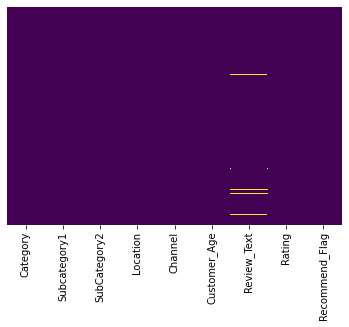

In [15]:
# visualizing missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

In [16]:
# since we can see that data have very less amount of missing values
# will drop these missing values

In [17]:
df = df.dropna().reset_index(drop=True)

In [18]:
# summary fo numerical variables
df.describe()

,Customer_Age,Rating,Recommend_Flag
count,22628.000000,22628.000000,22628.000000
mean,43.282880,4.183092,0.818764
std,12.328176,1.115911,0.385222
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,1.000000
50%,41.000000,5.000000,1.000000
75%,52.000000,5.000000,1.000000
max,99.000000,5.000000,1.000000


In [19]:
# summary for categorical variables
df.describe(include="object")

,Category,Subcategory1,SubCategory2,Location,Channel,Review_Text
count,22628,22628,22628,22628,22628,22628
unique,3,6,20,4,2,22621
top,General,Tops,Dresses,Gurgaon,Web,Perfect fit and i've gotten so many compliment...
freq,13365,10048,6145,8486,13090,3


In [20]:
df.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1


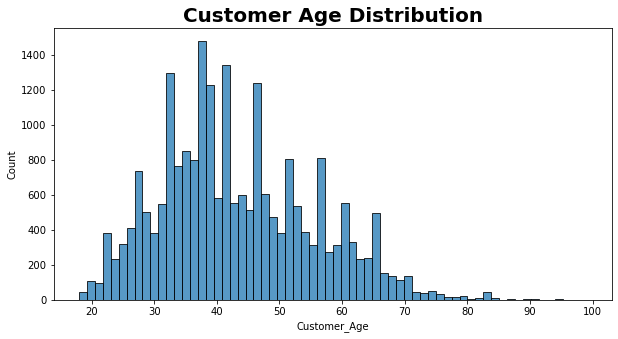

In [21]:
# customers Age distribution

plt.figure(figsize=(10,5))
sns.histplot(df["Customer_Age"])
plt.title("Customer Age Distribution",fontsize=20, fontweight='bold')
plt.show()

- from the above graph we can understand that age is following normal distribution

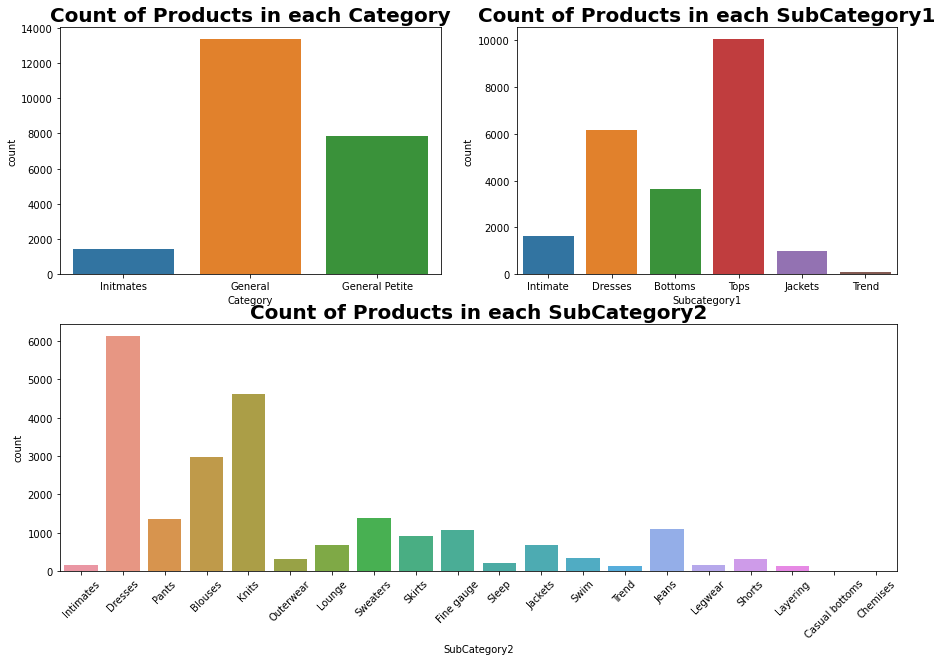

In [22]:
# countplot of categories

plt.figure(figsize=(15,10))

plt.subplot2grid((2,2),(0,0))
sns.countplot(x='Category', data=df)
plt.title('Count of Products in each Category', fontsize=20, fontweight='bold')

plt.subplot2grid((2,2),(0,1))
sns.countplot(x='Subcategory1', data=df)
plt.title('Count of Products in each SubCategory1', fontsize=20, fontweight='bold')

plt.subplot2grid((2,2),(1,0), colspan=2)
sns.countplot(x='SubCategory2', data=df)
plt.title('Count of Products in each SubCategory2', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

- We can see the Product Counts by Category, by subcategory1, by subcayegory2

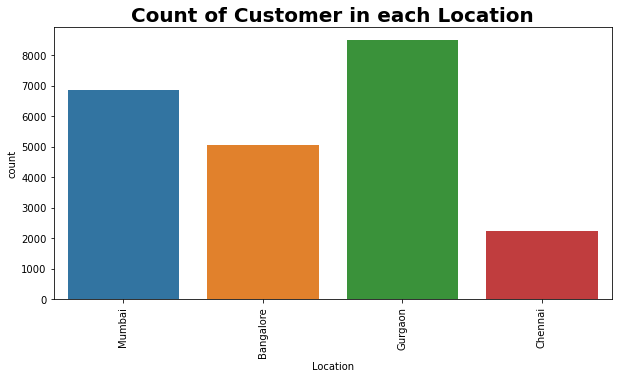

In [23]:
# countplot of lacation

plt.figure(figsize=(10,5))
sns.countplot(x="Location", data=df)
plt.title("Count of Customer in each Location", fontsize=20, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

- We can see that Gurgaon has more number of customers, where as chennai has the least number of customers

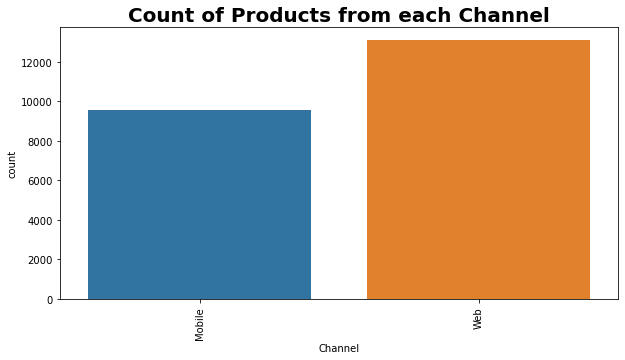

In [24]:
# countplot on channels

plt.figure(figsize=(10,5))
sns.countplot(x="Channel", data=df)
plt.title('Count of Products from each Channel', fontsize=20, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

- From the above plot we can see that channel Web is used more to purchase the products than Channel Mobile

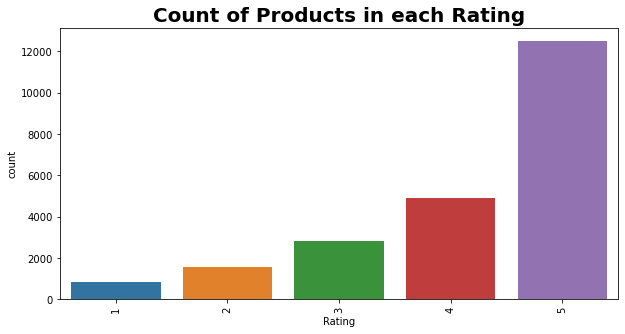

In [25]:
# countplot on Rating

plt.figure(figsize=(10,5))
sns.countplot(x="Rating", data=df)
plt.title('Count of Customers by Rating', fontsize=20, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

- From the above plot we can see that frequency of the rating 5 is high compared to others

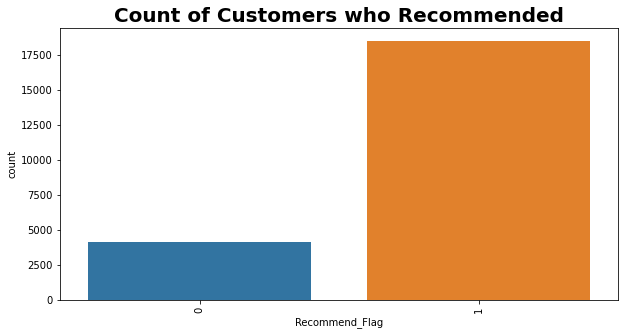

In [26]:
# countplot on Recommend_Flag

plt.figure(figsize=(10,5))
sns.countplot(x="Recommend_Flag", data=df)
plt.title('Count of Customers who Recommended', fontsize=20, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

- We can see that customers who recommended are more than those who didnot recommend

In [27]:
df

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...
22623,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,I was very happy to snag this dress at such a ...,5,1
22624,General Petite,Tops,Knits,Gurgaon,Web,48,"It reminds me of maternity clothes. soft, stre...",3,1
22625,General Petite,Dresses,Dresses,Gurgaon,Web,31,"This fit well, but the top was very see throug...",3,0
22626,General,Dresses,Dresses,Gurgaon,Web,28,I bought this dress for a wedding i have this ...,3,1


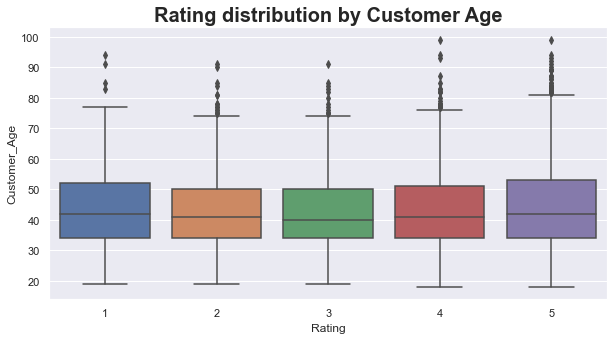

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x="Rating", y="Customer_Age", data=df)
plt.title("Rating distribution by Customer Age", fontsize=20, fontweight="bold")
plt.show()

- We can see that customers above Age 30 likes to give the ratings

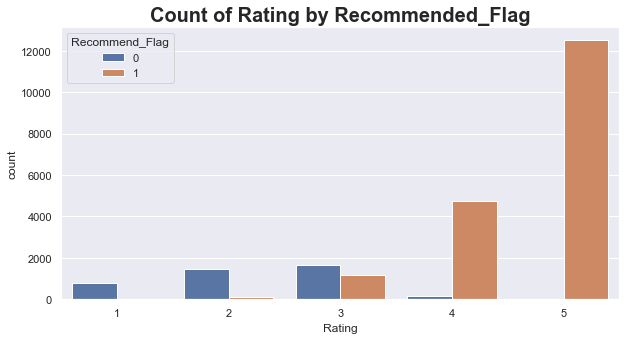

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="Rating", hue="Recommend_Flag", data=df)
plt.title("Count of Rating by Recommended_Flag", fontsize=20, fontweight="bold")
plt.show()

- We can see that customers who have Recommemded products have given high Ratings and vice versa

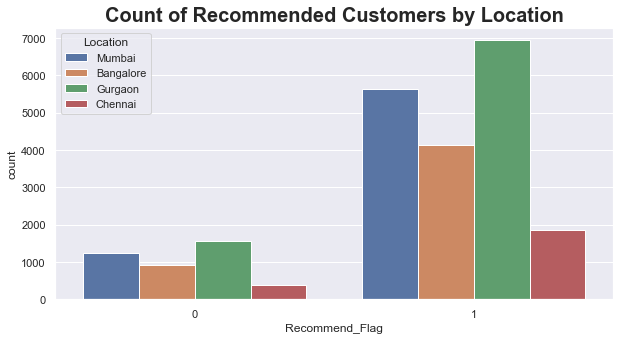

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="Recommend_Flag", hue="Location", data=df)
plt.title("Count of Recommended Customers by Location", fontsize=20, fontweight="bold")
plt.show()

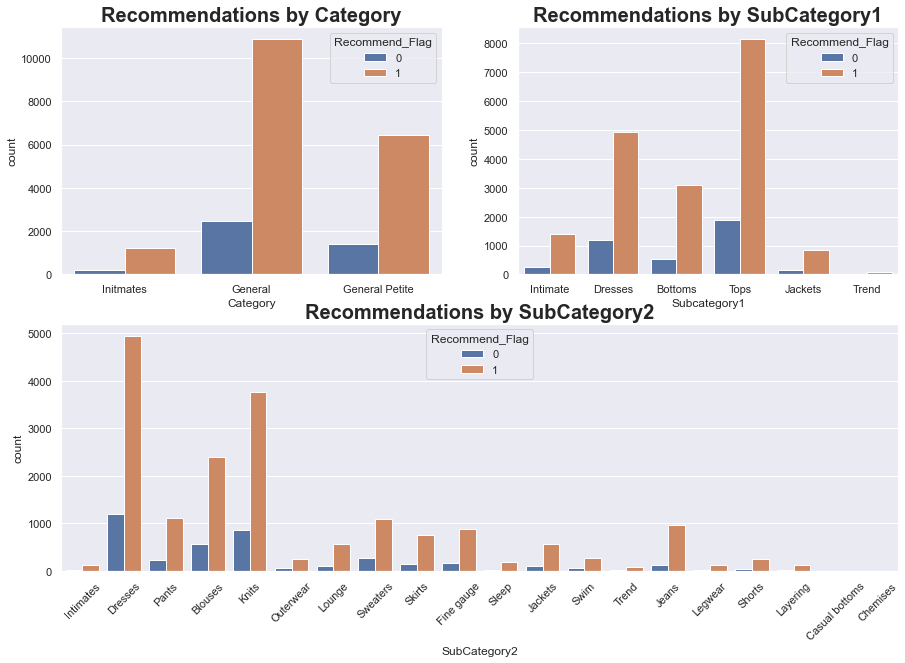

In [31]:
plt.figure(figsize=(15,10))

plt.subplot2grid((2,2),(0,0))
sns.countplot(x='Category', hue="Recommend_Flag", data=df)
plt.title('Recommendations by Category', fontsize=20, fontweight='bold')

plt.subplot2grid((2,2),(0,1))
sns.countplot(x='Subcategory1', hue="Recommend_Flag", data=df)
plt.title('Recommendations by SubCategory1', fontsize=20, fontweight='bold')

plt.subplot2grid((2,2),(1,0), colspan=2)
sns.countplot(x='SubCategory2', hue="Recommend_Flag", data=df)
plt.title('Recommendations by SubCategory2', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

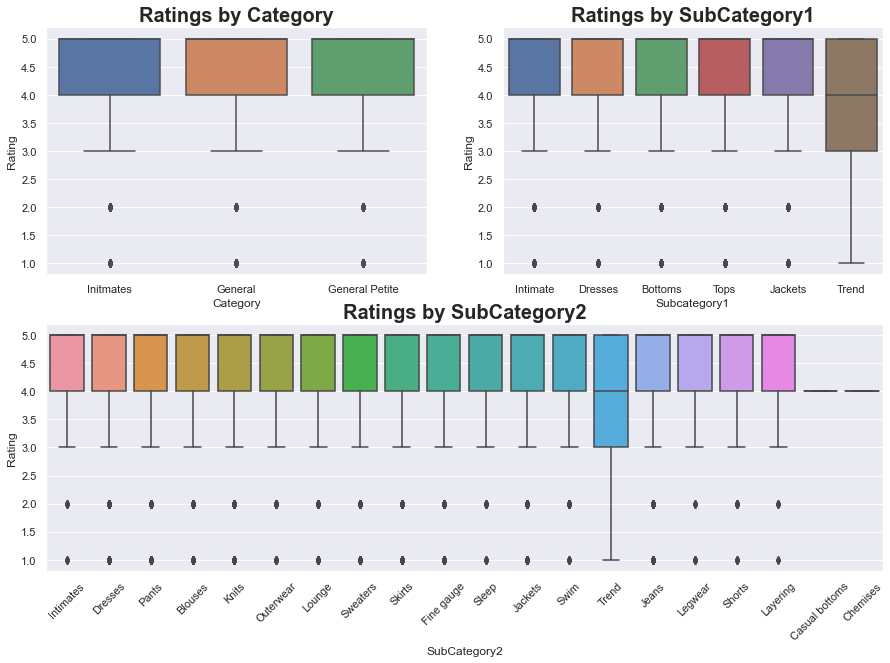

In [32]:
plt.figure(figsize=(15,10))

plt.subplot2grid((2,2),(0,0))
sns.boxplot(x='Category', y="Rating", data=df)
plt.title('Ratings by Category', fontsize=20, fontweight='bold')

plt.subplot2grid((2,2),(0,1))
sns.boxplot(x='Subcategory1', y="Rating", data=df)
plt.title('Ratings by SubCategory1', fontsize=20, fontweight='bold')

plt.subplot2grid((2,2),(1,0), colspan=2)
sns.boxplot(x='SubCategory2', y="Rating", data=df)
plt.title('Ratings by SubCategory2', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### Calculating Sentiment analysis using Textblob module

In [ ]:
df.head()

In [34]:
df['sentiment_score'] = df["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [35]:
df.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,sentiment_score
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,0.339583
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,0.073675
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,0.512891


In [36]:
df['sentiment'] = np.where(df.sentiment_score>0.1,'Positive', 'Negative')

In [37]:
df.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,sentiment_score,sentiment
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333,Positive
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,0.339583,Positive
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,0.512891,Positive


In [38]:
df.sentiment.value_counts()

Positive    18668
Negative     3960
Name: sentiment, dtype: int64

In [39]:
df.sentiment.value_counts()/sum(df.sentiment.value_counts())

Positive    0.824996
Negative    0.175004
Name: sentiment, dtype: float64

### Sentiment Analysis by Rating

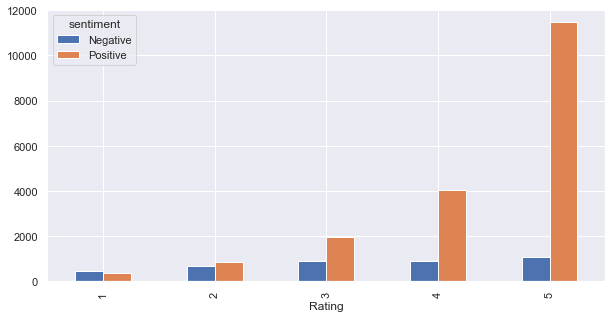

In [40]:
pd.crosstab(df.Rating, df.sentiment).plot(kind='bar', figsize=(10,5))
plt.show()

### Sentiment Analysis by Channel

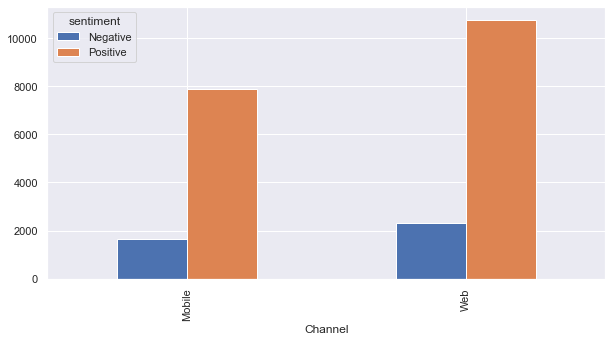

In [41]:
pd.crosstab(df.Channel, df.sentiment).plot(kind='bar', figsize=(10,5))
plt.show()

### Sentiment Analysis by Location

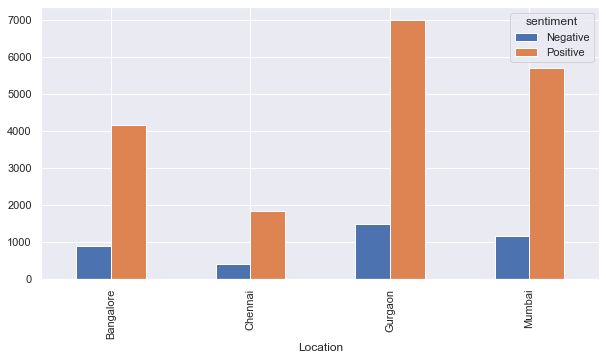

In [42]:
pd.crosstab(df.Location, df.sentiment).plot(kind='bar', figsize=(10,5))
plt.show()

### Sentiment Analysis by Category

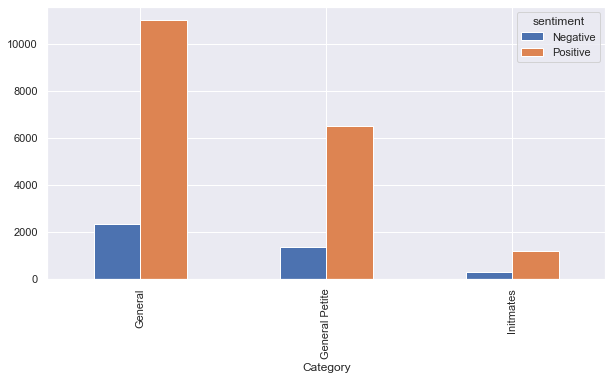

In [44]:
pd.crosstab(df.Category, df.sentiment).plot(kind='bar', figsize=(10,5))
plt.show()

### Sentiment Analysis by SubCategory1

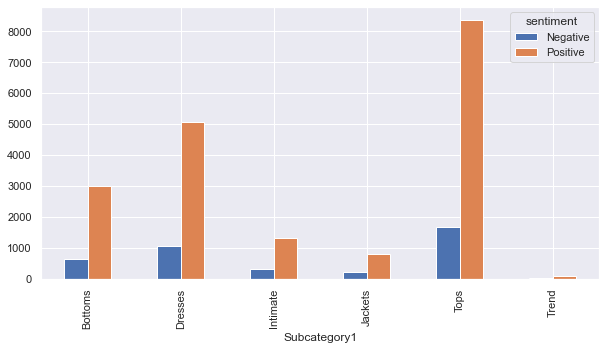

In [46]:
pd.crosstab(df.Subcategory1, df.sentiment).plot(kind='bar', figsize=(10,5))
plt.show()

### Sentiment Analysis by SubCategory2

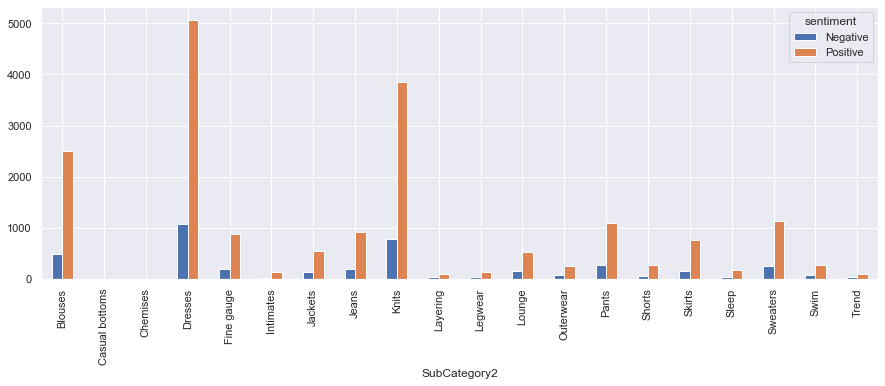

In [48]:
pd.crosstab(df.SubCategory2, df.sentiment).plot(kind='bar', figsize=(15,5))
plt.show()

### Split the data into train & Test

In [49]:
# define X and y
X = df.Review_Text
y = df.Rating

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16971,)
(5657,)
(16971,)
(5657,)


In [50]:
df.shape

(22628, 11)

In [51]:
df.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,sentiment_score,sentiment
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,0.633333,Positive
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,0.339583,Positive
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,0.073675,Negative
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.550000,Positive
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,0.512891,Positive


### Creating user defined functions for clean the text and pre-process the data

In [52]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [53]:
stop = set(nltk.corpus.stopwords.words('english'))

In [54]:
import string
def pre_process(text):
    #text = text.str.replace('/','')                           #Replacing the / with none
    #text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    #text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [55]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [56]:
X_train=pre_process(X_train)
X_test=pre_process(X_test)

### Vectorization (Count, Tfidf)

In [57]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=1000)
xtrain_count = count_vect.fit_transform(X_train)


### View the document term metrics

In [58]:
dtm=xtrain_count.toarray()

In [59]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
term = count_vect.get_feature_names()

In [60]:
count_vect.get_feature_names()

['able',
 'absolutely',
 'across',
 'actually',
 'add',
 'added',
 'addition',
 'adds',
 'adorable',
 'adore',
 'afraid',
 'ag',
 'ago',
 'agree',
 'airy',
 'aline',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'amount',
 'ankle',
 'another',
 'anyone',
 'anything',
 'anyway',
 'appear',
 'appears',
 'appropriate',
 'area',
 'areas',
 'arent',
 'arm',
 'armholes',
 'arms',
 'around',
 'arrived',
 'athletic',
 'attached',
 'attention',
 'attractive',
 'available',
 'average',
 'away',
 'awesome',
 'awful',
 'awkward',
 'b',
 'baby',
 'back',
 'bad',
 'bag',
 'baggy',
 'band',
 'barely',
 'based',
 'basic',
 'bc',
 'beach',
 'beading',
 'beautiful',
 'beautifully',
 'beige',
 'believe',
 'bell',
 'belly',
 'belt',
 'best',
 'better',
 'big',
 'bigger',
 'billowy',
 'bit',
 'black',
 'blazer',
 'blouse',
 'blue',
 'bodice',
 'body',
 'booties',
 'boots',
 'bother',
 'bottom',
 'bottoms',
 'bought',
 'boxy',
 'boyfriend',
 'bra',
 'brand',
 'brig

In [61]:
dtm1=pd.DataFrame(dtm)

In [62]:
dtm1.columns=count_vect.get_feature_names()

In [63]:
dtm1.head()

,able,absolutely,across,actually,add,added,addition,adds,adorable,adore,...,year,years,yellow,yes,yesterday,yet,youll,youre,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(20), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

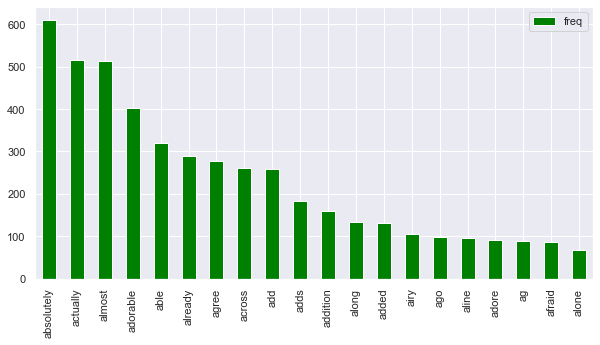

In [65]:
word_freq.plot(kind='bar', color='Green', figsize=(10,5))
plt.show()

### Generating word clouds using word frequencies (dictionary)

In [66]:
word_freq_dictionary = dict(dtm1.apply(sum))

In [67]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)

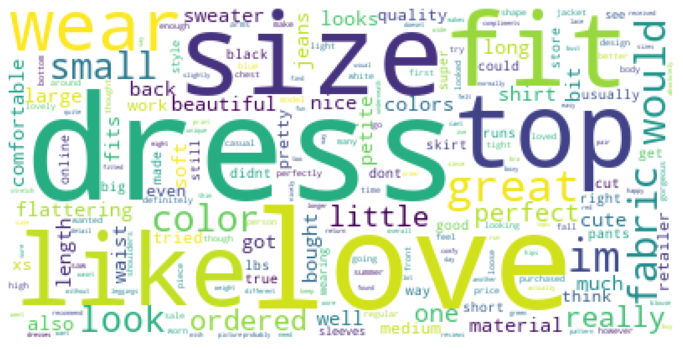

In [68]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Generate wordcloud based on words

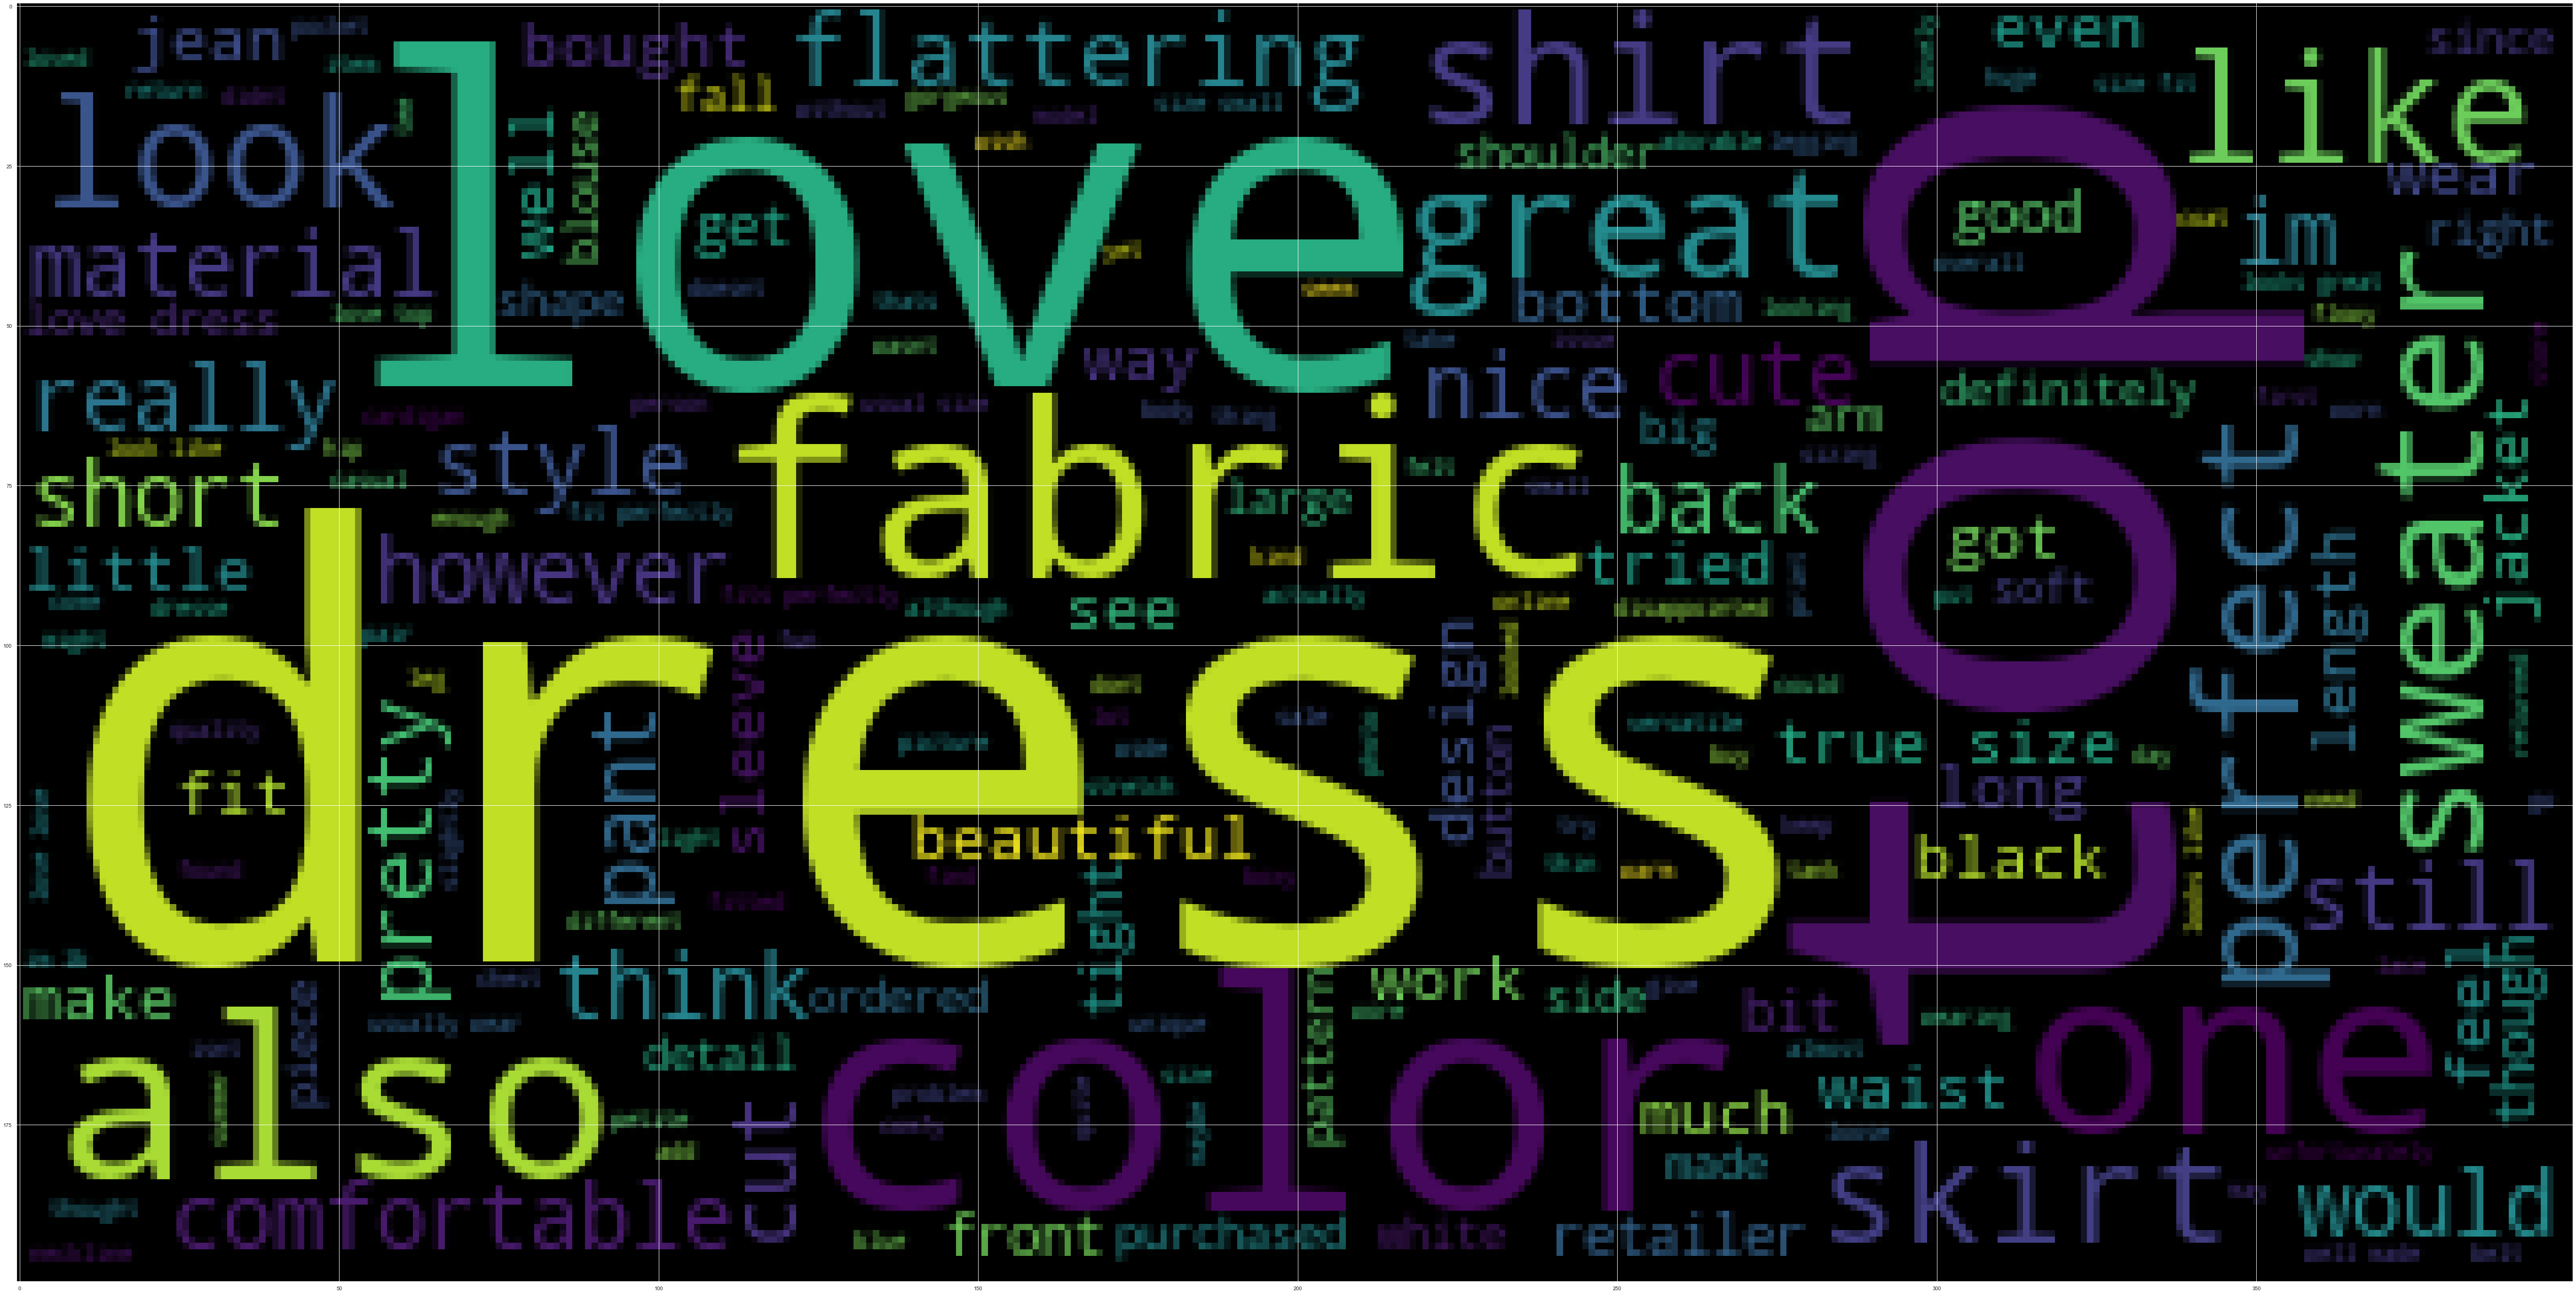

In [69]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Vectorization (count, tfidf) for both train & test

In [70]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=1000)
X_train_count = count_vect.fit_transform(X_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

#Test
X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)


In [71]:
dtm_count=pd.DataFrame(X_train_count.toarray(), columns=count_vect.get_feature_names())
dtm_tfidf=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

### Topic Modeling using gensim 

In [75]:
import smart_open
import gensim
from gensim import corpora

C:\Users\PANDA\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [76]:
X_train_tokens = [doc.split() for doc in X_train]  
# important words

In [77]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

# ref to the LDA Demo file class discussion

Dictionary(15713 unique tokens: ['almost', 'bought', 'cardigan', 'color', 'cut']...)


In [78]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [79]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [80]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

In [81]:
print(ldamodel.print_topics(num_topics=10, num_words=50))

[(0, '0.025*"top" + 0.018*"fit" + 0.014*"im" + 0.013*"love" + 0.013*"work" + 0.013*"like" + 0.013*"cut" + 0.012*"really" + 0.010*"would" + 0.009*"didnt" + 0.009*"fabric" + 0.008*"size" + 0.008*"flattering" + 0.008*"back" + 0.007*"short" + 0.007*"also" + 0.007*"wear" + 0.007*"wanted" + 0.007*"look" + 0.006*"small" + 0.006*"well" + 0.006*"cute" + 0.006*"nice" + 0.006*"pants" + 0.006*"body" + 0.006*"material" + 0.005*"much" + 0.005*"ordered" + 0.005*"little" + 0.005*"however" + 0.005*"great" + 0.005*"way" + 0.005*"shirt" + 0.005*"bit" + 0.005*"waist" + 0.005*"chest" + 0.005*"color" + 0.005*"wide" + 0.005*"bust" + 0.005*"shoulders" + 0.005*"pretty" + 0.004*"tight" + 0.004*"good" + 0.004*"around" + 0.004*"medium" + 0.004*"lbs" + 0.004*"petite" + 0.004*"large" + 0.004*"made" + 0.004*"bra"'), (1, '0.048*"dress" + 0.020*"small" + 0.018*"size" + 0.015*"im" + 0.012*"wear" + 0.010*"fit" + 0.010*"love" + 0.009*"ordered" + 0.009*"top" + 0.008*"would" + 0.008*"fits" + 0.007*"like" + 0.007*"medium" +

In [82]:
topics = ldamodel.show_topics(formatted=False, num_words=100)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,100))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 100 words:
top fit im love work like cut really would didnt fabric size flattering back short also wear wanted look small well cute nice pants body material much ordered little however great way shirt bit waist chest color wide bust shoulders pretty tight good around medium lbs petite large made bra think someone length looked one fits bottom torso usually tops area shape right quality style design unfortunately reference part front long low got though soft comfortable hips fine wasnt beautiful xs going still perfect dont sadly even see tried bought perfectly could dress type super maternity pattern better probably looks

Topic 2, top 100 words:
dress small size im wear fit love ordered top would fits like medium retailer beautiful usually perfect bought tight xs little could tried fabric one well great large even bust store chest get lbs back petite saw online got dresses perfectly shoulders normally reviews try runs looked big summer made cute flattering really loved al

### Topic Modeling using sklearn.decomposition

In [83]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [84]:
# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['surprised considering okay attractive ones awful pleasantly turtleneck comfort chic',
 'purple seasons classy picked twice coming deal statement careful easily',
 'staple wardrobe vest interesting pant relaxed addition everyday dressy wine',
 'dress compliments love comfortable great many wear highly wore recommend',
 'exchange barely send cup arent hole consider unusual bottoms likely',
 'wool old please suit tons stripes support interest itchy ever',
 'jeans pants pair leggings love great comfortable pilcro skinny fit',
 'shorts typical hoped gets beach event airy vintage youll weather',
 'maeve hide washes effect trim wonderful prettier terrible feeling surprise',
 'dry washed wash pregnant months clean shrunk cold average poncho',
 'coat live collar daughter warm garment water product item excellent',
 'knee photo skirt skirts drape nice great light fabric love',
 'great love fits bulky tee sweater fall soft true beautiful',
 'jean ankle prefer house narrow rolled throughout boyf

### Segmentation (KMeans clustering)

In [85]:
from sklearn.cluster import KMeans

In [86]:
model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1,random_state=5)
res = model.fit(X_train_tfidf)

In [87]:
sse_err = []
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

In [88]:
vocab = np.array(tfidf_vect.get_feature_names())

In [89]:
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
words=list(words)
words

['color',
 'wear',
 'many',
 'skinny',
 'received',
 'didnt',
 'look',
 'short',
 'large',
 'looks',
 'got',
 'soft',
 'fit',
 'skirt',
 'long',
 'get',
 'beautiful',
 'length',
 'sweater',
 'im',
 'love',
 'shirt',
 'back',
 'medium',
 'compliments',
 'colors',
 'top',
 'like',
 'really',
 'small',
 'petite',
 'fits',
 'perfect',
 'fabric',
 'true',
 'ordered',
 'pants',
 'one',
 'comfortable',
 'runs',
 'cute',
 'pair',
 'size',
 'would',
 'great',
 'usually',
 'sleeves',
 'wore',
 'dress',
 'lots',
 'flattering',
 'jeans']

In [90]:
X_train_final = pd.concat([pd.DataFrame(X_train, index=X_train.index), pd.DataFrame(model.labels_, index=X_train.index)],axis=1)

In [91]:
X_train_final.columns = ['text', 'cluster']

In [92]:
X_train_final.cluster.value_counts()

1    3660
2    2787
3    2460
9    1716
4    1644
5    1372
8    1081
6     962
7     723
0     566
Name: cluster, dtype: int64

In [100]:
terms = pd.Series(term)
terms

0            able
1      absolutely
2          across
3        actually
4             add
          ...    
995           yet
996         youll
997         youre
998           zip
999        zipper
Length: 1000, dtype: object

In [101]:
vocab_frame=pd.DataFrame({'words':term},index=[term])
N=10


order_centroids = model.cluster_centers_.argsort()[:,::-1] 
order_centroids

array([[149, 478, 647, ..., 789,  66, 117],
       [444, 712, 977, ..., 961, 714, 986],
       [466, 330, 814, ..., 677, 774, 369],
       ...,
       [568, 466, 279, ..., 877, 427, 134],
       [456, 746, 437, ..., 808, 479, 789],
       [870, 466, 444, ..., 434,  11, 988]], dtype=int64)

In [102]:
print("Top terms per cluster:")
print()
num_clusters = len(X_train_final.cluster.value_counts())
#sort cluster centers by proximity to centroid
order_centroids = model.cluster_centers_.argsort()[:, ::-1] 
order_centroids
N=20
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    
    for ind in order_centroids[i, :N]: #replace 10 with n words per cluster
        print(' %s' % vocab_frame.loc[term[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()

Top terms per cluster:

Cluster 0: compliments, many, received, wore, got, dress, love, wear, get, lots, time, comfortable, great, top, ive, first, bought, fit, beautiful, every,

Cluster 1: like, shirt, would, fabric, back, look, really, fit, one, didnt, im, much, material, little, nice, cute, color, looks, ordered, tried,

Cluster 2: love, great, sweater, soft, color, comfortable, perfect, wear, colors, fit, super, bought, flattering, fits, jacket, well, beautiful, fall, comfy, fabric,

Cluster 3: dress, love, fit, wear, fabric, beautiful, size, great, im, flattering, perfect, would, like, comfortable, really, little, fits, look, well, petite,

Cluster 4: size, true, skirt, fit, fits, love, im, ordered, wear, great, waist, dress, one, perfect, would, like, well, flattering, large, color,

Cluster 5: small, medium, im, size, large, wear, ordered, runs, usually, fit, top, xs, little, would, love, lbs, big, dress, great, like,

Cluster 6: jeans, great, love, skinny, fit, wear, pair, per

## Classification

### Create user defined function for train Classification the models

In [111]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors

In [112]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for L1, Count Vectors: ", accuracy_L1)


NB  for L1, Count Vectors:  0.6045607212303341


In [113]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)
print("NB  for L1, WordLevel TF-IDF: ", accuracy_L1)

NB  for L1, WordLevel TF-IDF:  0.6155205939543927


In [114]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, Count Vectors: ", accuracy_L1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_count, y_train, X_test_count, y_test)
print("LR  for L1, WordLevel TF-IDF: ", accuracy_L1)


LR  for L1, Count Vectors:  0.6349655294325615
LR  for L1, WordLevel TF-IDF:  0.6264804666784515


In [115]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), X_train_count, y_train, X_test_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.6273643273820046
SVC  for L1, WordLevel TF-IDF:  0.6202934417535796


### Adding Features to a Document-Term Matrix

In [118]:
df.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer_Age', 'Review_Text', 'Rating', 'Recommend_Flag',
       'sentiment_score', 'sentiment'],
      dtype='object')

In [119]:
# create a DataFrame that only contains the 5-star and 1-star reviews
df = df[(df.Rating==5) | (df.Rating==1)]

# define X and y
feature_cols = ['Review_Text', 'sentiment_score', 'Recommend_Flag']
X = df[feature_cols]
y = df.Rating

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
# use CountVectorizer with text column only
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=1000, min_df=5, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(10011, 1000)
(3337, 1000)


(10011, 2)

In [123]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.Review_Text)
X_test_dtm = vect.transform(X_test.Review_Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(10011, 9814)
(3337, 9814)


(10011, 2)

In [126]:
# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Review_Text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Review_Text', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(3337, 9816)

In [124]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9616421935870543


In [127]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9943062631105783


In [128]:
from xgboost import XGBClassifier

In [129]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)
xgb_estimator.fit(X_train_dtm_extra, y_train)

[23:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [130]:
y_pred_class = xgb_estimator.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9982019778243931


In [131]:
#With all the tuning parameters
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [132]:
xgb_estimator.fit(X_train_dtm_extra, y_train)

[23:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "reg_alpa", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:47:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              random_state=42, reg_alpa=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbose=1, verbosity=None)

In [133]:
y_pred_class = xgb_estimator.predict(X_test_dtm_extra)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9982019778243931
